# Systolic BP

In [1]:
#import statements
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#for heat_map
import seaborn as sns
#for linear regression
from sklearn import linear_model
#for ols method
import statsmodels.formula.api as sm
#for plotting scatter matrix
from pandas.tools.plotting import scatter_matrix
import math
#for getting p value
import statsmodels.stats.diagnostic as sms
#for ridge regression
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
#for mean squared error
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import scale
from plotly.offline import plot
import plotly.plotly as py
import plotly.graph_objs as go

from sklearn import preprocessing

In [2]:
systolicBP_data = pd.read_csv('Ex03_SystolicBP_Regreesion.csv')
systolicBP_data.head()

,Age,Treated,Gender,FamilySize,Diet,Weight,Height,ScaledBMI,SystolicBP
0,45,1,0,2,2,99.149109,1.680932,35.090422,117.280944
1,62,1,1,4,1,76.609814,1.509772,33.609452,127.346514
2,61,1,0,2,2,72.619743,1.692017,25.365606,122.021401
3,51,1,0,3,2,73.858286,1.604062,28.704958,117.430179
4,42,1,0,2,1,83.861856,1.648855,30.846062,112.765810


In [3]:
systolicBP_data.dropna(how = 'any', inplace = True)

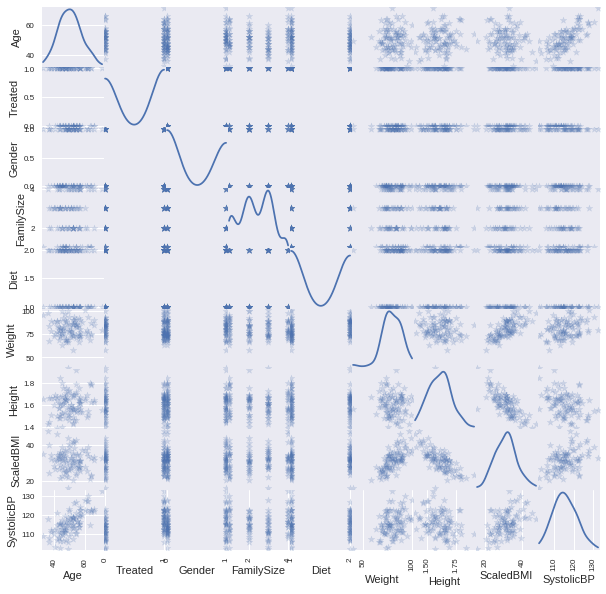

In [4]:
scatter_matrix(systolicBP_data,alpha=0.2, figsize=(10, 10), diagonal='kde', grid=True, marker='*')
plt.show()

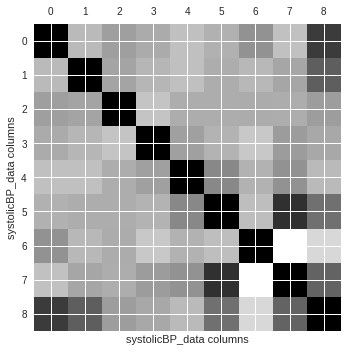

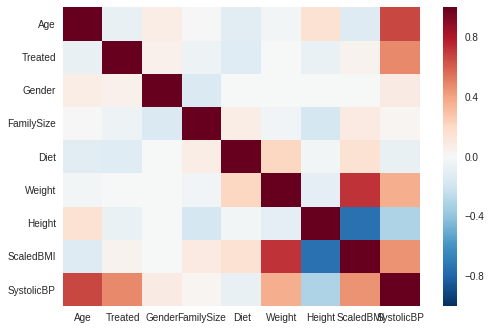

In [5]:
plt.matshow(systolicBP_data.corr())
plt.xlabel('systolicBP_data columns')
plt.ylabel('systolicBP_data columns')
plt.xticklabels = systolicBP_data.columns.values
plt.yticklabels = systolicBP_data.columns.values
plt.show()

corr = systolicBP_data.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

plt.show()

In [6]:
data_x_train1 = systolicBP_data.iloc[:70,0:8]
data_x_test1 = systolicBP_data.iloc[71:,0:8]
data_y_train1 = systolicBP_data.iloc[:70,-1]
data_y_test1 = systolicBP_data.iloc[71:,-1]

# regr1 = linear_model.LinearRegression()
print(regr1.fit(data_x_train1, data_y_train1))
print("coefficients = ", regr1.coef_, "\nintercept = ",regr1.intercept_)
print("Score = ", regr1.score(data_x_test1, data_y_test1))
print("Mean squared error: ",np.mean((regr1.predict(data_x_test1)- data_y_test1)**2) )
print("Root mean squared error: ", math.sqrt(np.mean((regr1.predict(data_x_test1)- data_y_test1)**2)))

plt.scatter(regr1.predict(data_x_test1),data_y_test1, color='r')
plt.plot(regr1.predict(data_x_test1),data_y_test1, color='c',linewidth=3)
plt.show()

plt.hist(regr1.predict(data_x_test1)- data_y_test1, color='m', bins = 10)
plt.show()
plt.boxplot(np.array(regr1.predict(data_x_test1)- data_y_test1),0)
plt.show()


In [8]:
result1= sm.ols(formula="SystolicBP ~ Age + Treated + Gender + FamilySize + Diet + Weight + Height + ScaledBMI", data=systolic_bp).fit()
print(result1.summary())

NameError: name 'systolic_bp' is not defined

### Dropping diet

In [ ]:
data_x_train2 = systolicBP_data.iloc[:70,[0,1,2,3,5,6,7]]
data_x_test2 = systolicBP_data.iloc[71:,[0,1,2,3,5,6,7]]
data_y_train2 = systolicBP_data.iloc[:70,-1]
data_y_test2 = systolicBP_data.iloc[71:,-1]

In [ ]:
regr2 = linear_model.LinearRegression()
print(regr2.fit(data_x_train2, data_y_train2))
print("coefficients = ", regr2.coef_, "\nintercept = ",regr2.intercept_)
print("Score = ", regr2.score(data_x_test2, data_y_test2))
print("Mean squared error: ",np.mean((regr2.predict(data_x_test2)- data_y_test2)**2) )
print("Root mean squared error: ", math.sqrt(np.mean((regr2.predict(data_x_test2)- data_y_test2)**2)))

plt.scatter(regr2.predict(data_x_test2),data_y_test2, color='r')
plt.plot(regr2.predict(data_x_test2),data_y_test2, color='c',linewidth=3)
plt.show()

plt.hist(regr2.predict(data_x_test2)- data_y_test2, color='m', bins = 10)
plt.show()
plt.boxplot(np.array(regr2.predict(data_x_test2)- data_y_test2),0)
plt.show()

In [ ]:
result2= sm.ols(formula="SystolicBP ~ Age + Treated + Gender + FamilySize + Weight + Height + ScaledBMI", data=systolic_bp).fit()
print(result2.summary())

### Dropping FamilySize and Gender

In [ ]:
data_x_train3 = systolicBP_data.iloc[:70,[0,1,5,6,7]]
data_x_test3 = systolicBP_data.iloc[71:,[0,1,5,6,7]]
data_y_train3 = systolicBP_data.iloc[:70,-1]
data_y_test3 = systolicBP_data.iloc[71:,-1]

In [ ]:
regr3 = linear_model.LinearRegression()
print(regr3.fit(data_x_train3, data_y_train3))
print(regr3.coef_,"....", regr3.intercept_)
print("Score = ", regr3.score(data_x_test3, data_y_test3))
print("Mean squared error: ",np.mean((regr3.predict(data_x_test3)- data_y_test3)**2) )
print("Root mean squared error: ", math.sqrt(np.mean((regr3.predict(data_x_test3)- data_y_test3)**2)))
plt.scatter(regr3.predict(data_x_test3),data_y_test3, color='r')
plt.plot(regr3.predict(data_x_test3),data_y_test3, color='c',linewidth=3)
plt.show()

plt.hist(regr3.predict(data_x_test3)- data_y_test3, color='m')
plt.show()
plt.boxplot(np.array(regr3.predict(data_x_test3)- data_y_test3),0)
plt.show()


In [ ]:
result3= sm.ols(formula="SystolicBP ~ Age + Treated + Weight + Height + ScaledBMI", data=systolic_bp).fit()
print(result3.summary())

### Dropping family size, height, weight, gender

In [ ]:
data_x_train4 = systolicBP_data.iloc[:70,[0,1,4,7]]
data_x_test4 = systolicBP_data.iloc[71:,[0,1,4,7]]
data_y_train4 = systolicBP_data.iloc[:70,-1]
data_y_test4 = systolicBP_data.iloc[71:,-1]

In [ ]:
regr4 = linear_model.LinearRegression()
print(regr4.fit(data_x_train4, data_y_train4))
print(regr4.coef_,"....", regr4.intercept_)
print("Score = ", regr4.score(data_x_test4, data_y_test4))
print("Mean squared error: ",np.mean((regr4.predict(data_x_test4)- data_y_test4)**2) )
print("Root mean squared error: ", math.sqrt(np.mean((regr4.predict(data_x_test4)- data_y_test4)**2)))


plt.scatter(regr4.predict(data_x_test4), data_y_test4, color='r')
plt.plot(regr4.predict(data_x_test4), data_y_test4, color='c',linewidth=3)
plt.show()
plt.hist(regr4.predict(data_x_test4)- data_y_test4, color='m',bins=5)
plt.show()
plt.boxplot(np.array(regr4.predict(data_x_test4)- data_y_test4),0)
plt.show()

In [ ]:
result4= sm.ols(formula="SystolicBP ~ Age + Diet + Treated + ScaledBMI", data=systolic_bp).fit()
print(result4.summary())

In [ ]:
name = ['F statistics', 'p_value']
test = sms.het_goldfeldquandt(result4.resid, result4.model.exog)
list(zip(name,test))

### Ridge Regression

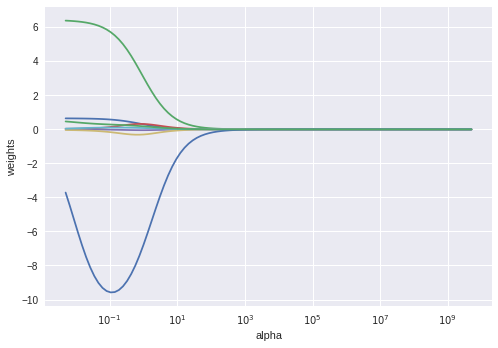

In [11]:
alphas = 10**np.linspace(10,-2,100)*0.5
ridge = Ridge(normalize=True)
coefs = []
for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(data_x_train1,data_y_train1)
    coefs.append(ridge.coef_)
coefs
coefs_df = pd.DataFrame(coefs)
coefs_df.columns = data_x_train1.columns
coefs_df['Alpha'] = pd.DataFrame(alphas)
coefs_df

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale("log")
plt.axis("tight")
plt.xlabel('alpha')
plt.ylabel('weights')


#### Plotting using plotly

In [12]:
trace0 = go.Scatter(
    x = coefs_df.Alpha,
    y = coefs_df.Age,
    name = 'Age',
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4)
)
trace1 = go.Scatter(
    x = coefs_df.Alpha,
    y = coefs_df.Treated,
    name = 'Treated',
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,)
)
trace2 = go.Scatter(
    x = coefs_df.Alpha,
    y = coefs_df.Gender,
    name = 'Gender',
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4,
        dash = 'dash') # dash options include 'dash', 'dot', and 'dashdot'
)
trace3 = go.Scatter(
    x = coefs_df.Alpha,
    y = coefs_df.FamilySize,
    name = 'FamilySize',
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,
        dash = 'dash')
)
trace4 = go.Scatter(
    x = coefs_df.Alpha,
    y = coefs_df.Diet,
    name = 'Diet',
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4,
        dash = 'dot')
)
trace5 = go.Scatter(
    x = coefs_df.Alpha,
    y = coefs_df.Weight,
    name = 'Weight',
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,
        dash = 'dot')
)
trace6 = go.Scatter(
    x = coefs_df.Alpha,
    y = coefs_df.Height,
    name = 'Height',
    line = dict(
        color = ('rgb(40, 123, 167)'),
        width = 4,
        dash = 'dot')
)
trace7 = go.Scatter(
    x = coefs_df.Alpha,
    y = coefs_df.ScaledBMI,
    name = 'ScaledBMI',
    line = dict(
        color = ('rgb(40, 123, 167)'),
        width = 4,
        dash = 'dot')
)
data1 = [trace0, trace1, trace2, trace3, trace4, trace5, trace6]

layout = dict(title = 'Alpha vs weights',
              xaxis = dict(title = 'Alpha'),
              yaxis = dict(title = 'Weights'),
              )

fig = dict(data=data1, layout=layout)
plot(fig)

'file:///home/user/Desktop/Stack/ML_Basics/ML_Basics/temp-plot.html'

In [13]:
ridge2 = Ridge(alpha=10**10, normalize=True)
ridge2.fit(data_x_train1,data_y_train1)
# Fit a ridge regression on the training data
pred2 = ridge2.predict(data_x_test1)
# Use this model to predict the test data
print(pd.Series(ridge2.coef_, index=data_x_test1.columns))
# Print coefficients
#rss = mse.mean_squared_error(data_y_test, pred2)
rss = mse(data_y_test1, pred2)
print(rss)

Age           5.311036e-11
Treated       6.348922e-10
Gender        1.032112e-10
FamilySize   -1.311146e-11
Diet         -7.140553e-11
Weight        2.277640e-11
Height       -1.987037e-09
ScaledBMI     5.148561e-11
dtype: float64
34.6121182748


In [15]:
ridgecv = RidgeCV(alphas=alphas, scoring="mean_squared_error", normalize=True)
ridgecv.fit(data_x_train1,data_y_train1)
alpha_value = ridgecv.alpha_
print(alpha_value)

0.005


/home/user/Desktop/Stack/ML_Basics/ML_Basics/lib/python3.5/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

/home/user/Desktop/Stack/ML_Basics/ML_Basics/lib/python3.5/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

/home/user/Desktop/Stack/ML_Basics/ML_Basics/lib/python3.5/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

/home/user/Desktop/Stack/ML_Basics/ML_Basics/lib/python3.5/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

/home/user/Desktop/Stack/ML_Basi

In [16]:
ridge3 = Ridge(alpha=alpha_value, normalize=True)
ridge3.fit(data_x_train1,data_y_train1)
pred2 = ridge3.predict(data_x_test1)
mse(data_y_test1, pred2)

0.018722934440553042

In [19]:
ridge3.fit(data_x_train1,data_y_train1)
pd.Series(ridge3.coef_, index=data_x_train1.columns)

Age           0.646685
Treated       6.392594
Gender        0.034422
FamilySize    0.003769
Diet         -0.037299
Weight        0.045328
Height       -3.714334
ScaledBMI     0.465609
dtype: float64

### Lasso Regression

In [20]:
#lasso = Lasso(max_iter=10000, normalize=True)
alphas = 10**np.linspace(10,-2,100)*0.5
lasso = Lasso(normalize=True)
coefs_lasso = []
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(data_x_train1), data_y_train1)
    coefs_lasso.append(lasso.coef_)


In [23]:
coefs_lasso_df = pd.DataFrame(coefs_lasso)
coefs_lasso_df.columns = data_x_train1.columns
coefs_lasso_df['Alpha'] = pd.DataFrame(alphas)
coefs_lasso_df

,Age,Treated,Gender,FamilySize,Diet,Weight,Height,ScaledBMI,Alpha
0,0.000000,0.000000,0.0,-0.0,-0.0,0.000000,-0.0,0.000000,5.000000e+09
1,0.000000,0.000000,0.0,-0.0,-0.0,0.000000,-0.0,0.000000,3.782317e+09
2,0.000000,0.000000,0.0,-0.0,-0.0,0.000000,-0.0,0.000000,2.861184e+09
3,0.000000,0.000000,0.0,-0.0,-0.0,0.000000,-0.0,0.000000,2.164381e+09
4,0.000000,0.000000,0.0,-0.0,-0.0,0.000000,-0.0,0.000000,1.637275e+09
5,0.000000,0.000000,0.0,-0.0,-0.0,0.000000,-0.0,0.000000,1.238538e+09
6,0.000000,0.000000,0.0,-0.0,-0.0,0.000000,-0.0,0.000000,9.369087e+08
7,0.000000,0.000000,0.0,-0.0,-0.0,0.000000,-0.0,0.000000,7.087371e+08
8,0.000000,0.000000,0.0,-0.0,-0.0,0.000000,-0.0,0.000000,5.361336e+08
9,0.000000,0.000000,0.0,-0.0,-0.0,0.000000,-0.0,0.000000,4.055654e+08


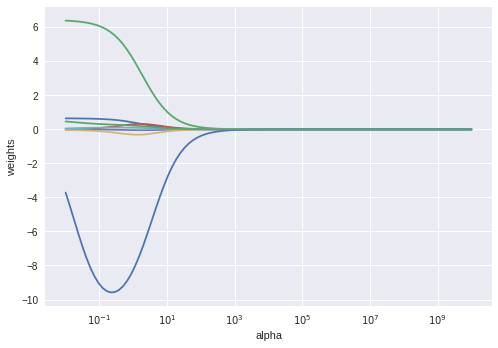

In [21]:
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale("log")
plt.axis("tight")
plt.xlabel('alpha')
plt.ylabel('weights')